In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt     
import seaborn as sns
import sys
sys.path.append('..')
from src.utils import *

In [93]:
path = '/home/dylangoetting/SpatialBenchmark/logs/20240726-223636 llava-v1.6-mistral-7b-hf/df_results.pkl'
df = pd.read_pickle(path)
df.columns

Index(['prediction', 'ground_truth', 'mse', 'condfidence', 'next_action',
       'tokens_generated', 'success', 'speed', 'scene_id', 'object_dist',
       'model', 'input_tokens', 'itr', 'image_id', 'score', 'confidence'],
      dtype='object')

In [104]:
var = df['ground_truth'].var()
print(var)
df['score'] = df['score'].clip(0, 1)
print(df[df['mse'] < var].count()[0]/df.count()[0])
naive_score = (abs(df['ground_truth'].mean() - df['ground_truth'])/df['ground_truth']).mean()
print(df[df['score'] < naive_score].count()[0]/df.count()[0])

3.3616514572276697
0.84
0.91


/tmp/ipykernel_2316840/4108906434.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df[df['mse'] < var].count()[0]/df.count()[0])
/tmp/ipykernel_2316840/4108906434.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df[df['mse'] < var].count()[0]/df.count()[0])
/tmp/ipykernel_2316840/4108906434.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df[df['score'] < naive_score].count()[0]/df.count()[0])
/tmp/ipykern

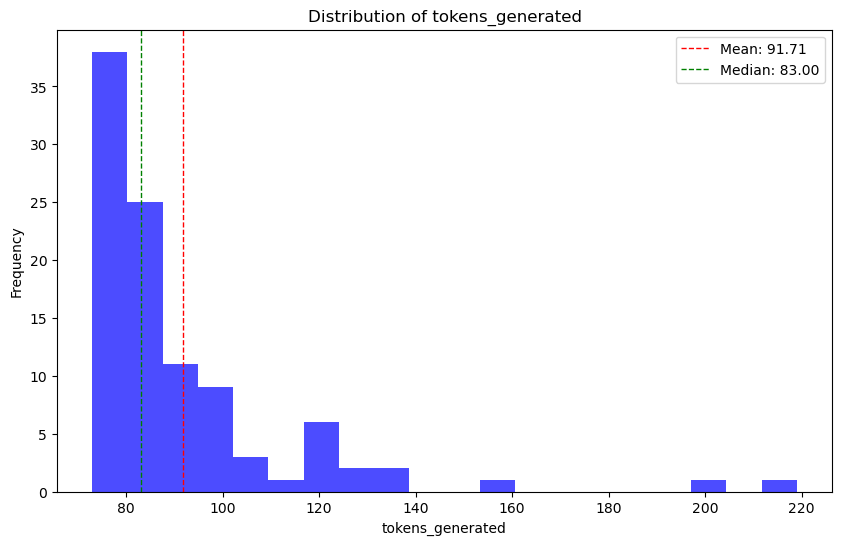

In [96]:
plot_distribution(df, 'tokens_generated')

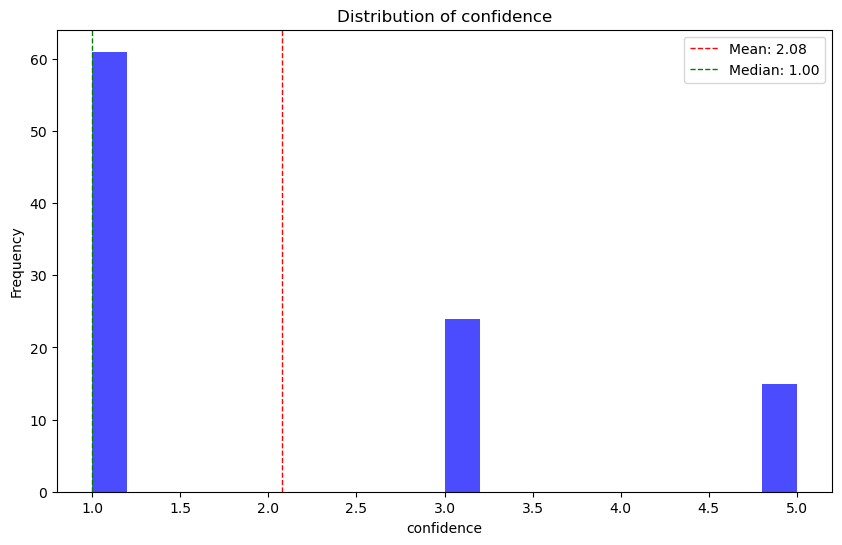

In [97]:
plot_distribution(df, 'confidence')

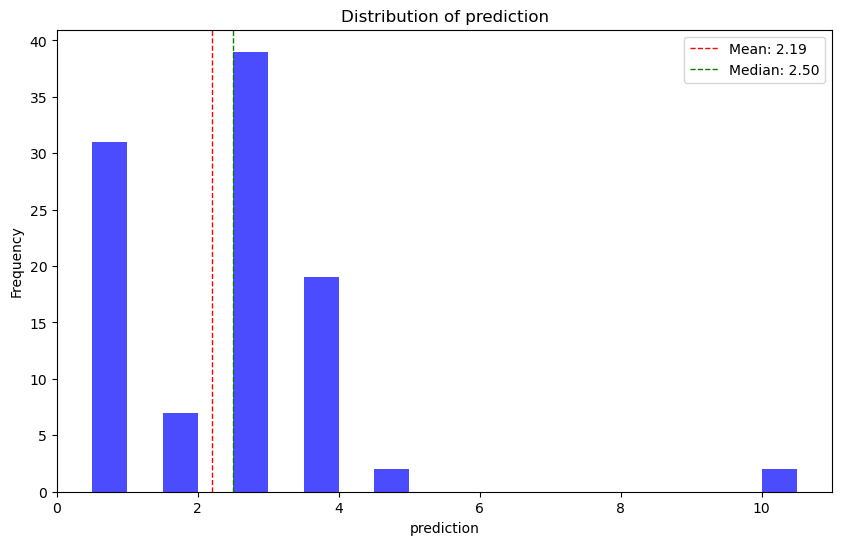

In [98]:
plot_distribution(df, 'prediction')

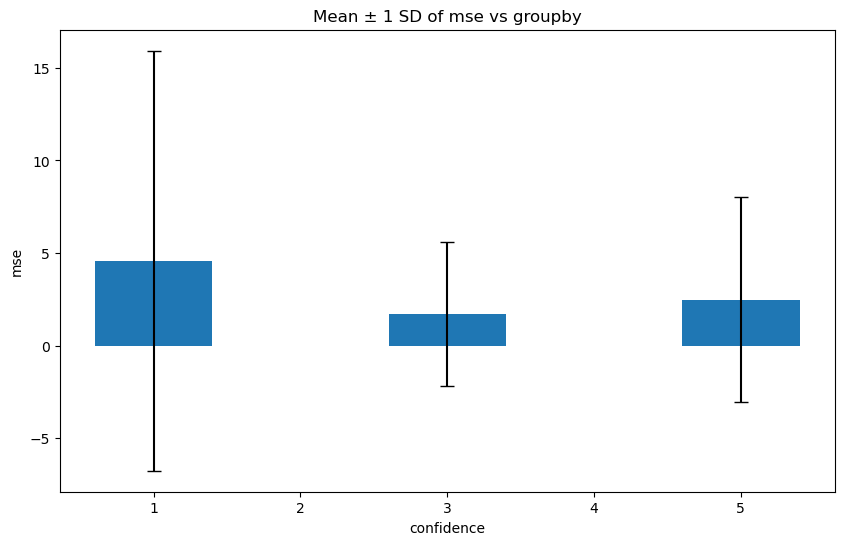

In [109]:
plot_groupby(df, 'confidence', 'mse', std=True)

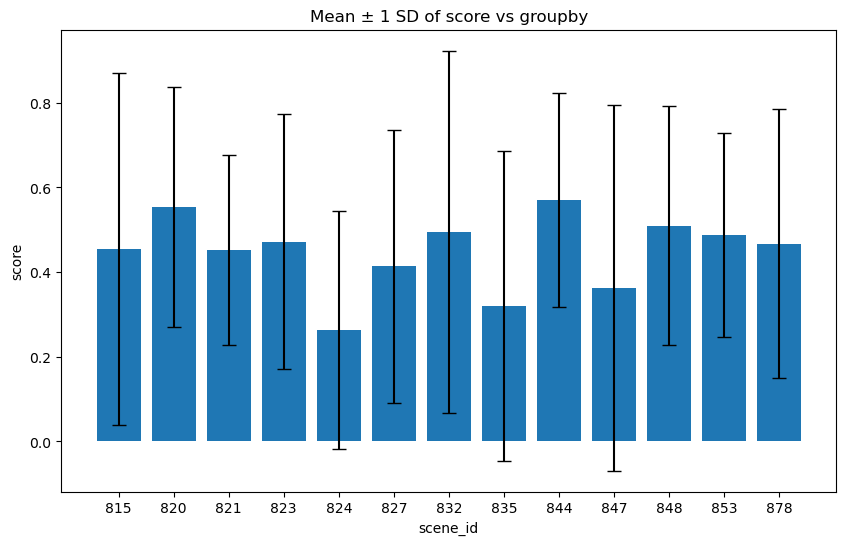

In [106]:

plot_groupby(df, 'scene_id', 'score', std=True)

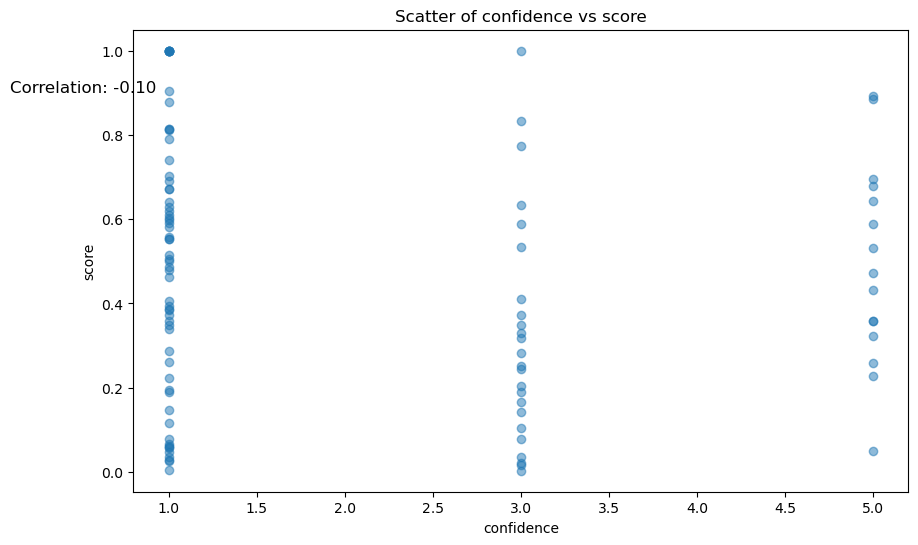

In [107]:
plot_correlation_scatter(df, 'confidence', 'score')

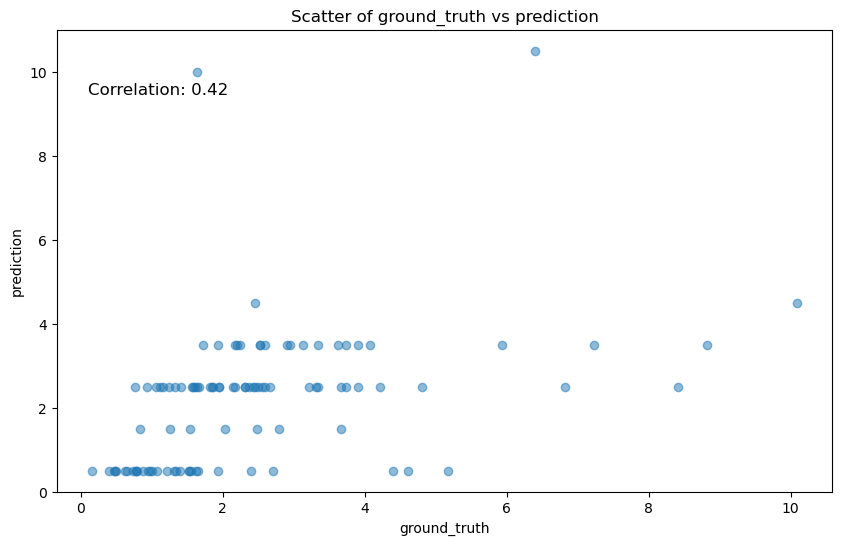

In [108]:
plot_correlation_scatter(df, 'ground_truth', 'prediction')

In [90]:
df.sort_values('score')

,prediction,ground_truth,mse,condfidence,next_action,tokens_generated,success,speed,scene_id,object_dist,model,input_tokens,itr,image_id,score,confidence
14,0.5,0.504259,0.000018,0,na,22,1,22.806083,b'844',3.066548,llava-v1.6-mistral-7b-hf,128,14,14,0.008446,3
40,1.5,1.464289,0.001275,0,na,22,1,20.992374,b'815',5.927370,llava-v1.6-mistral-7b-hf,130,40,40,0.024388,5
76,2.5,2.576128,0.005795,0,na,88,1,25.475825,b'824',3.711790,llava-v1.6-mistral-7b-hf,127,76,76,0.029551,4
93,3.5,3.625382,0.015721,0,na,22,1,19.995425,b'832',5.572600,llava-v1.6-mistral-7b-hf,128,93,93,0.034584,4
92,2.5,2.590798,0.008244,0,na,22,1,19.573264,b'853',5.030138,llava-v1.6-mistral-7b-hf,130,92,92,0.035046,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,2.5,1.225394,1.624621,0,na,22,1,21.624446,b'844',2.769234,llava-v1.6-mistral-7b-hf,126,15,15,1.040160,4
74,3.5,1.711457,3.198886,0,na,22,1,20.323729,b'820',3.755517,llava-v1.6-mistral-7b-hf,128,74,74,1.045041,4
91,3.5,1.627874,3.504855,0,na,22,1,20.399436,b'853',5.284417,llava-v1.6-mistral-7b-hf,128,91,91,1.150043,4
39,2.5,1.008298,2.225176,0,na,22,1,20.569301,b'848',5.724595,llava-v1.6-mistral-7b-hf,127,39,39,1.479427,4
